# Data Science Capstone 2

## Weather Forecaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the datasets
weather_dataset = pd.read_csv("modified_data/weather_prediction_dataset_cleaned.csv")

#This dataset is optional and provides a template showing all the times the weather is appropriate for a picnic
weather_for_picnic = pd.read_csv("raw_data/weather_prediction_bbq_labels.csv")

In [3]:
#Initial details of the dataset
print("Shape of dataset:", weather_dataset.shape)
weather_dataset.head()

Shape of dataset: (3654, 165)


DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ...                 0.5   
2              2.2             0.1  ...                -1.0   
3              3.9             0.5  ...                 2.5   
4              6.0             3.8  ...                -1.8   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0                 0.7               1.6            0.97          1.0275   
1                 2.0               2.0            0.99          1.0293   
2                 2.8               3.4            0.91          1.0267   
3                 4.6               4.9            0.95          1.0222   
4                 2.9               3.6            0.95          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                    0.25                 0.04              8.5   
1                    0.17                 0.16              7.9   
2                    0.27                 0.00              8.1   
3                    0.11                 0.44              8.6   
4                    0.39                 0.04              8.0   

   TOURS_temp_min  TOURS_temp_max  
0             7.2             9.8  
1             6.6             9.2  
2             6.6             9.6  
3             6.4            10.8  
4             6.4             9.5  

[5 rows x 165 columns]

In [4]:
city_names = ["BASEL", "BUDAPEST", "DE_BILT", "DRESDEN", "DUSSELDORF", "HEATHROW", "KASSEL", "LJUBLJANA", "MAASTRICHT",
              "MALMO", "MONTELIMAR", "MUENCHEN", "OSLO", "PERPIGNAN", "ROMA", "SONNBLICK", "STOCKHOLM", "TOURS"]

In [5]:
# For loop to construct a list of sub dataframes, each specific to a city
cities = {}
for city in city_names:
    pattern = f'DATE|MONTH|{city}'
    mask = weather_dataset.columns.str.contains(pattern, regex=True)
    sub_df = weather_dataset.loc[:, mask]
    cities[city] = sub_df

In [6]:
variables = ['temp_mean', 'temp_max', 'temp_min', 'cloud_cover', 'wind_speed', 'wind_gust',
            'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine']

In [7]:
# For loop to construct a list of sub dataframes, each specific to a measurement
measurements = {}
for var in variables:
    pattern = f'DATE|MONTH|{var}'
    mask = weather_dataset.columns.str.contains(pattern, regex=True)
    sub_df = weather_dataset.loc[:, mask]
    measurements[var] = sub_df

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os

In [9]:
df_scaled = weather_dataset.set_index('DATE')
df_scaled_index = df_scaled.index
df_scaled_columns = df_scaled.columns
months = weather_dataset['MONTH']
df_scaled

MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
DATE                                                                 
20000101      1                  8            0.89          1.0286   
20000102      1                  8            0.87          1.0318   
20000103      1                  5            0.81          1.0314   
20000104      1                  7            0.79          1.0262   
20000105      1                  5            0.90          1.0246   
...         ...                ...             ...             ...   
20091228     12                  7            0.82          1.0084   
20091229     12                  7            0.92          1.0028   
20091230     12                  8            0.92          0.9979   
20091231     12                  7            0.93          0.9958   
20100101      1                  8            0.93          0.9965   

          BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
DATE                                                                    
20000101                    0.20                 0.03             0.0   
20000102                    0.25                 0.00             0.0   
20000103                    0.50                 0.00             3.7   
20000104                    0.63                 0.35             6.9   
20000105                    0.51                 0.07             3.7   
...                          ...                  ...             ...   
20091228                    0.28                 0.42             0.3   
20091229                    0.22                 1.68             0.2   
20091230                    0.07                 1.54             0.0   
20091231                    0.17                 0.57             0.1   
20100101                    0.08                 0.56             0.0   

          BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
DATE                                                       ...   
20000101              2.9             1.6             3.9  ...   
20000102              3.6             2.7             4.8  ...   
20000103              2.2             0.1             4.8  ...   
20000104              3.9             0.5             7.5  ...   
20000105              6.0             3.8             8.6  ...   
...                   ...             ...             ...  ...   
20091228              3.2             1.0             4.8  ...   
20091229              4.5             2.4            10.0  ...   
20091230              8.5             7.5            11.5  ...   
20091231              6.6             4.3             7.9  ...   
20100101              2.9            -0.2             4.8  ...   

          STOCKHOLM_temp_min  STOCKHOLM_temp_max  TOURS_wind_speed  \
DATE                                                                 
20000101                -9.3                 0.7               1.6   
20000102                 0.5                 2.0               2.0   
20000103                -1.0                 2.8               3.4   
20000104                 2.5                 4.6               4.9   
20000105                -1.8                 2.9               3.6   
...                      ...                 ...               ...   
20091228                -2.7                 2.4               3.7   
20091229                -9.5                 0.8               5.3   
20091230               -12.5                -7.4               3.8   
20091231                -9.3                -6.5               4.2   
20100101                -8.8                -7.0               3.4   

          TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
DATE                                                               
20000101            0.97          1.0275                    0.25   
20000102            0.99          1.0293                    0.17   
20000103            0.91          1.0267                    0.27   
20000104            0.95          1.022

In [10]:
df_scaled_index

Index([20000101, 20000102, 20000103, 20000104, 20000105, 20000106, 20000107,
       20000108, 20000109, 20000110,
       ...
       20091223, 20091224, 20091225, 20091226, 20091227, 20091228, 20091229,
       20091230, 20091231, 20100101],
      dtype='int64', name='DATE', length=3654)

In [11]:
df_scaled_columns

Index(['MONTH', 'BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=164)

In [12]:
months

0        1
1        1
2        1
3        1
4        1
        ..
3649    12
3650    12
3651    12
3652    12
3653     1
Name: MONTH, Length: 3654, dtype: int64

In [13]:
weather_scaled = scale(df_scaled)

In [14]:
weather_scaled_df = pd.DataFrame(weather_scaled, columns=df_scaled_columns)
weather_scaled_df = weather_scaled_df.rename(columns={"MONTH":"MONTH_scaled"})
weather_scaled_df.insert(loc=0, column='MONTH', value=months)
weather_scaled_df.head()

MONTH  MONTH_scaled  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      1     -1.600412           1.110260        1.344433        1.347006   
1      1     -1.600412           1.110260        1.158857        1.748954   
2      1     -1.600412          -0.179963        0.602130        1.698710   
3      1     -1.600412           0.680186        0.416555        1.045546   
4      1     -1.600412          -0.179963        1.437221        0.844572   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0               -1.208678            -0.382044       -1.076608   
1               -1.155215            -0.437993       -1.076608   
2               -0.887898            -0.437993       -0.222009   
3               -0.748894             0.214755        0.517103   
4               -0.877206            -0.307444       -0.222009   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0        -1.095641       -0.810098  ...           -1.986856   
1        -1.001222       -0.644746  ...           -0.635086   
2        -1.190060       -1.035579  ...           -0.841989   
3        -0.960756       -0.975451  ...           -0.359214   
4        -0.677498       -0.479393  ...           -0.952338   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0           -1.203558         -1.366925        1.628018        1.229638   
1           -1.058291         -1.103708        1.801093        1.438568   
2           -0.968895         -0.182448        1.108791        1.136780   
3           -0.767755          0.804617        1.454942        0.614455   
4           -0.957721         -0.050839        1.454942        0.463561   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0               -1.208822            -0.346132        -0.573097   
1               -1.295183            -0.061835        -0.665886   
2               -1.187232            -0.440898        -0.634957   
3               -1.359953             0.601525        -0.557632   
4               -1.057690            -0.346132        -0.650422   

   TOURS_temp_min  TOURS_temp_max  
0       -0.116057       -0.875278  
1       -0.221478       -0.953060  
2       -0.221478       -0.901205  
3       -0.256618       -0.745641  
4       -0.256618       -0.914169  

[5 rows x 165 columns]

In [15]:
print(weather_scaled_df.mean())

MONTH                     6.520799e+00
MONTH_scaled             -2.333474e-17
BASEL_cloud_cover        -4.083579e-17
BASEL_humidity            1.030618e-16
BASEL_pressure            2.885729e-15
                              ...     
TOURS_global_radiation    1.050063e-16
TOURS_precipitation       3.500211e-17
TOURS_temp_mean           8.167158e-17
TOURS_temp_min            2.527930e-17
TOURS_temp_max           -6.611509e-17
Length: 165, dtype: float64


In [16]:
print(weather_scaled_df.std(ddof=0))

MONTH                     3.449611
MONTH_scaled              1.000000
BASEL_cloud_cover         1.000000
BASEL_humidity            1.000000
BASEL_pressure            1.000000
                            ...   
TOURS_global_radiation    1.000000
TOURS_precipitation       1.000000
TOURS_temp_mean           1.000000
TOURS_temp_min            1.000000
TOURS_temp_max            1.000000
Length: 165, dtype: float64


In [17]:
#Fit the scaled data via a PCA transformation
weather_pca = PCA().fit(weather_scaled)

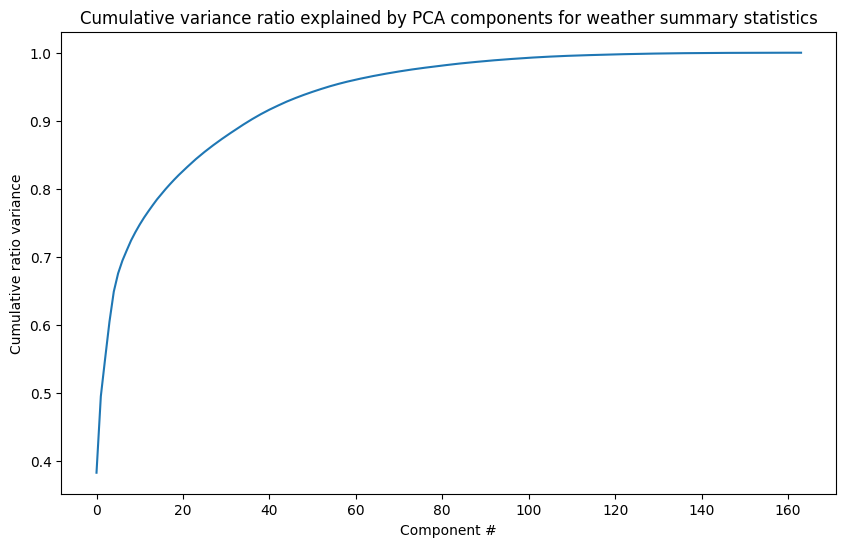

In [18]:
plt.subplots(figsize=(10, 6))
plt.plot(weather_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for weather summary statistics');

### Check for correlation

Text(0.5, 0.98, 'Heatmap for Basel, Switzerland')

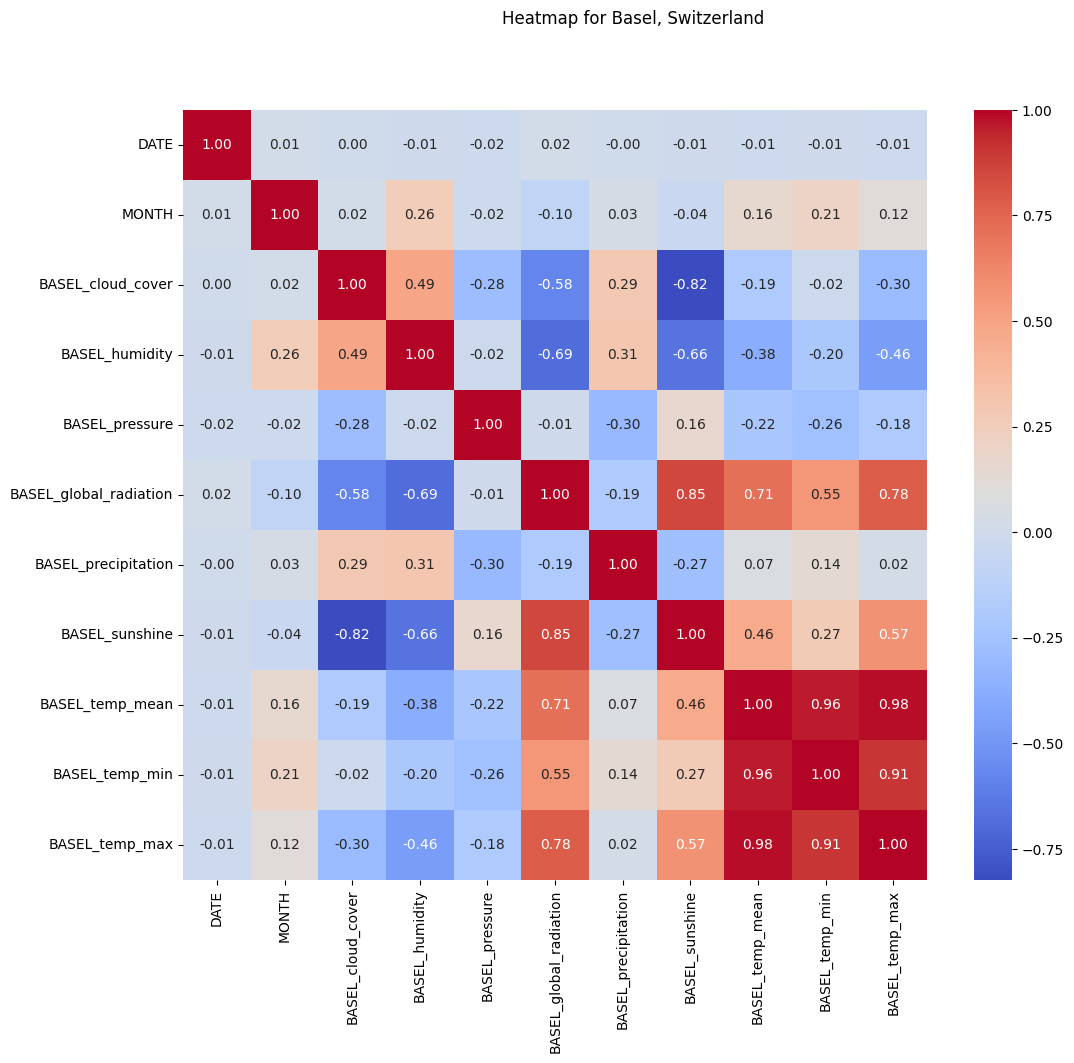

In [19]:
basel_df = cities['BASEL']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(basel_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Basel, Switzerland")

Text(0.5, 0.98, 'Heatmap for Budapest, Hungary')

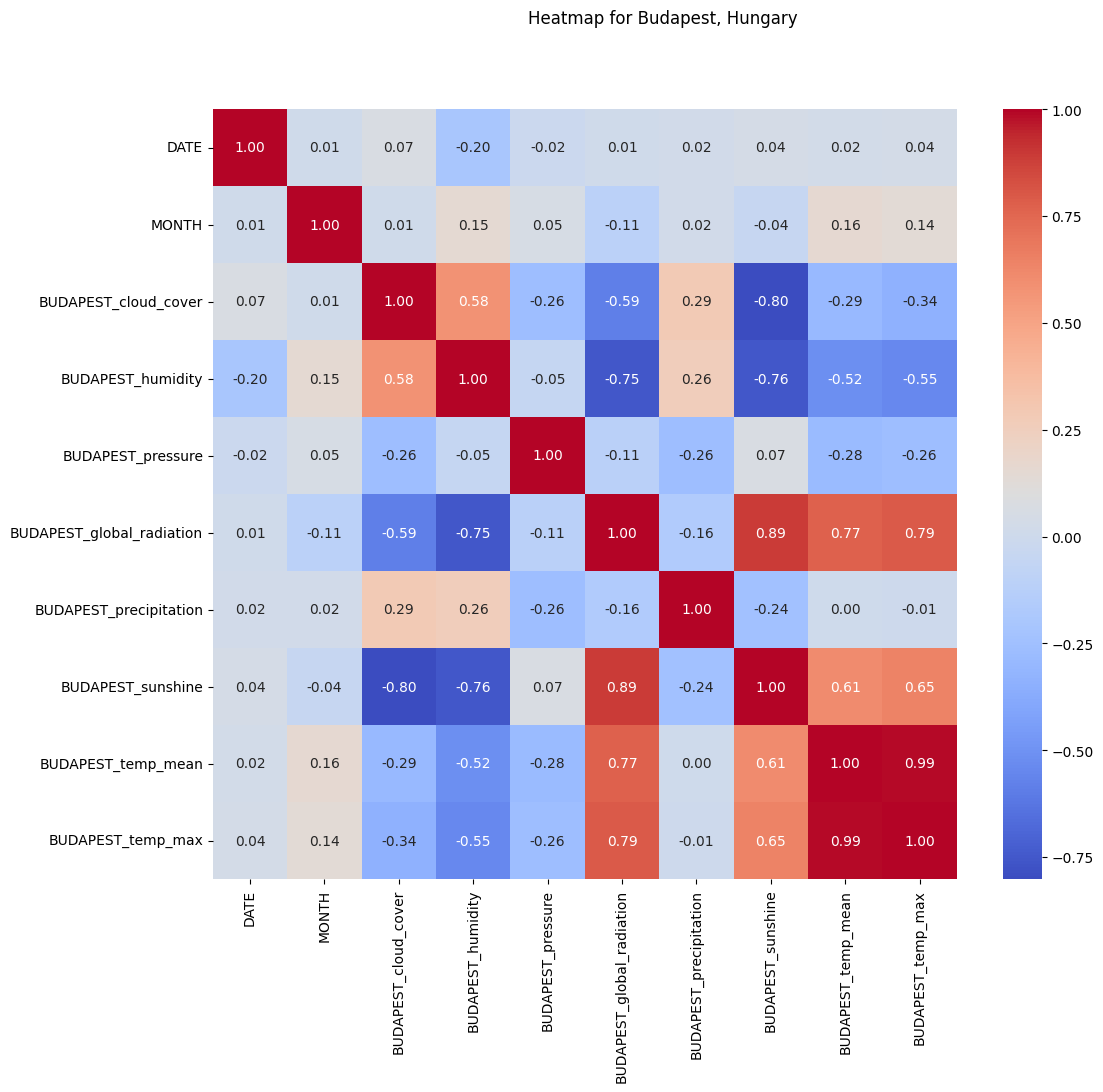

In [20]:
budapest_df = cities['BUDAPEST']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(budapest_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Budapest, Hungary")

Text(0.5, 0.98, 'Heatmap for De Bilt, the Netherlands')

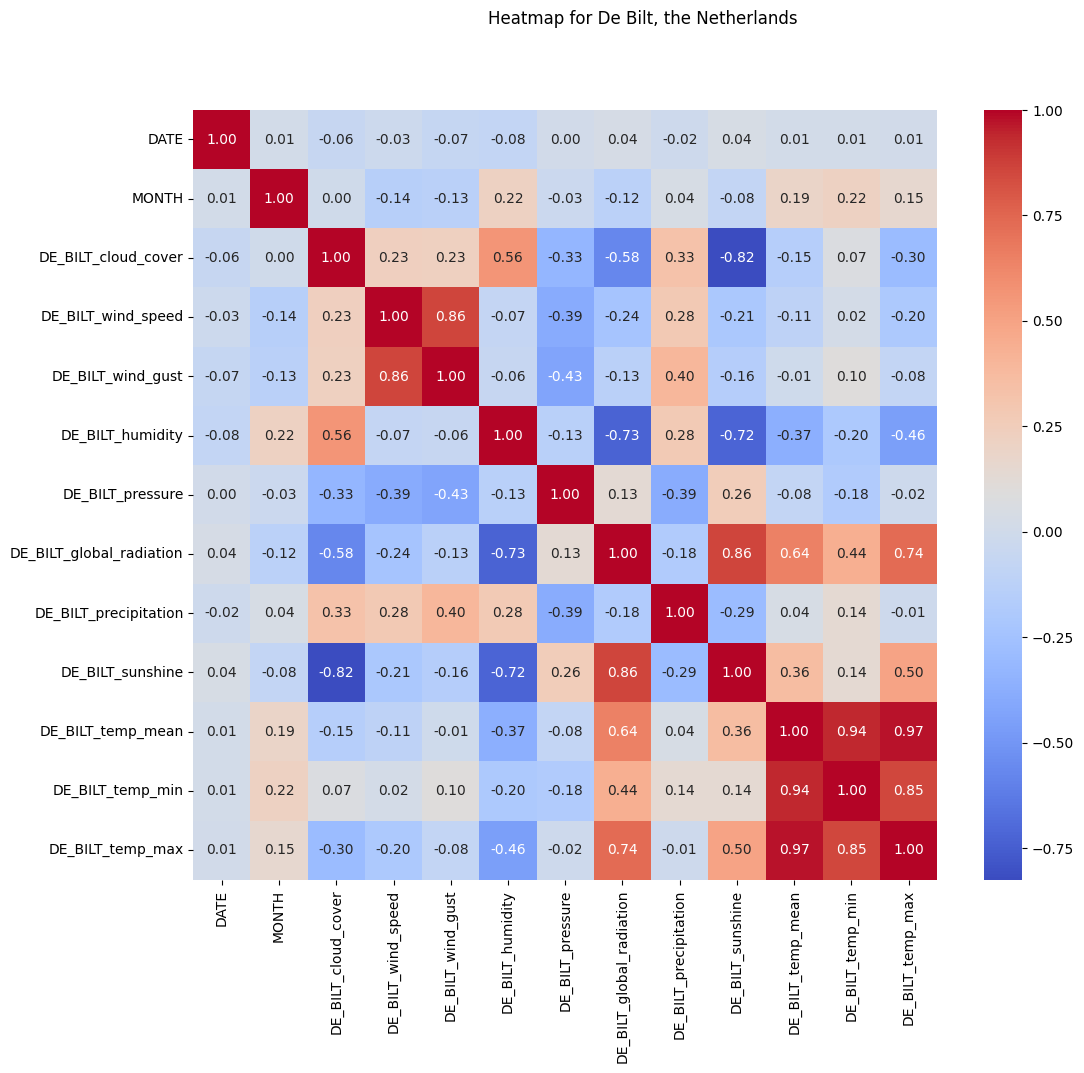

In [21]:
de_bilt_df = cities['DE_BILT']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(de_bilt_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for De Bilt, the Netherlands")

Text(0.5, 0.98, 'Heatmap for Dresden, Germany')

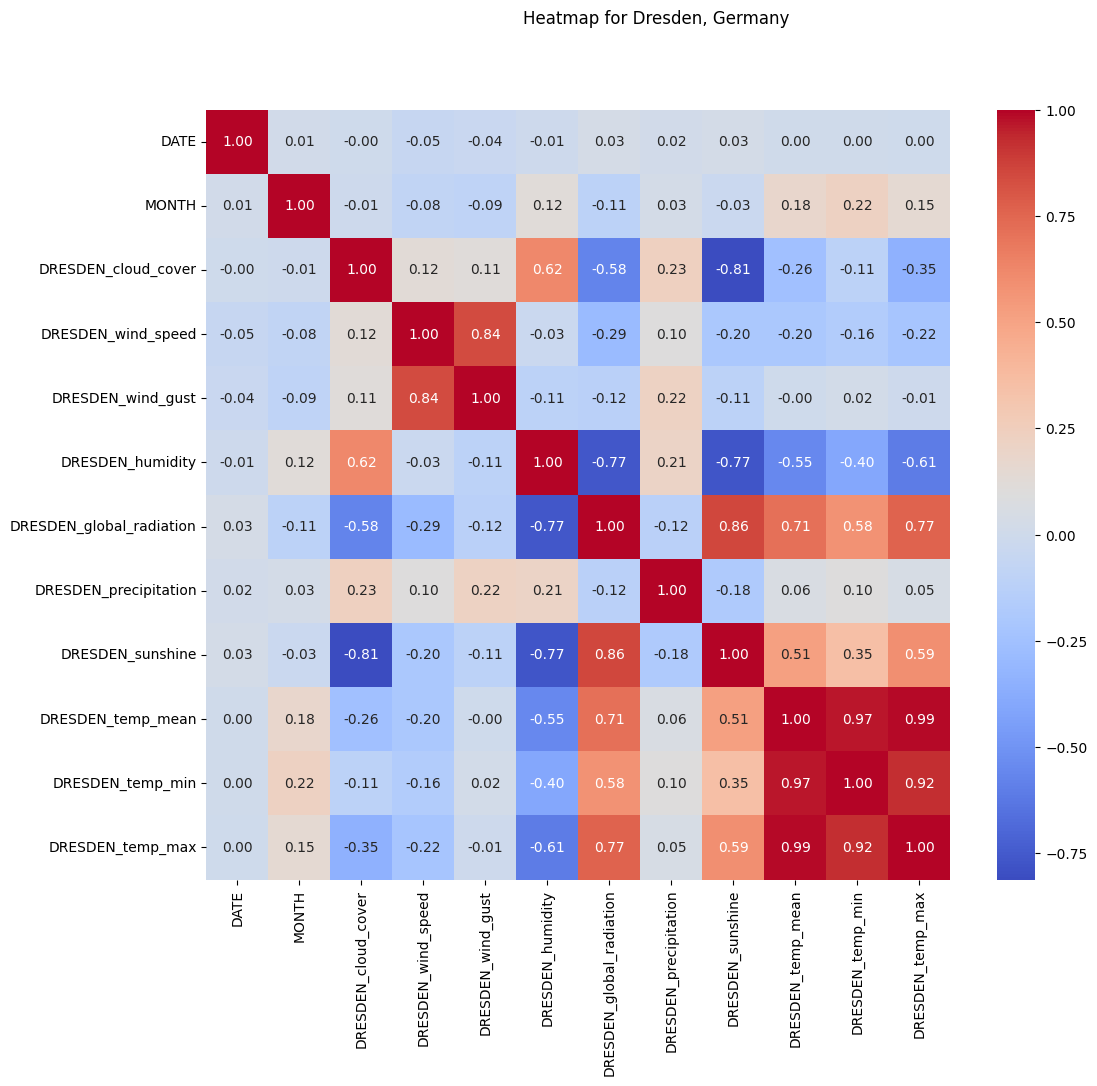

In [22]:
dresden_df = cities['DRESDEN']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dresden_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Dresden, Germany")

Text(0.5, 0.98, 'Heatmap for Dusseldorf, Germany')

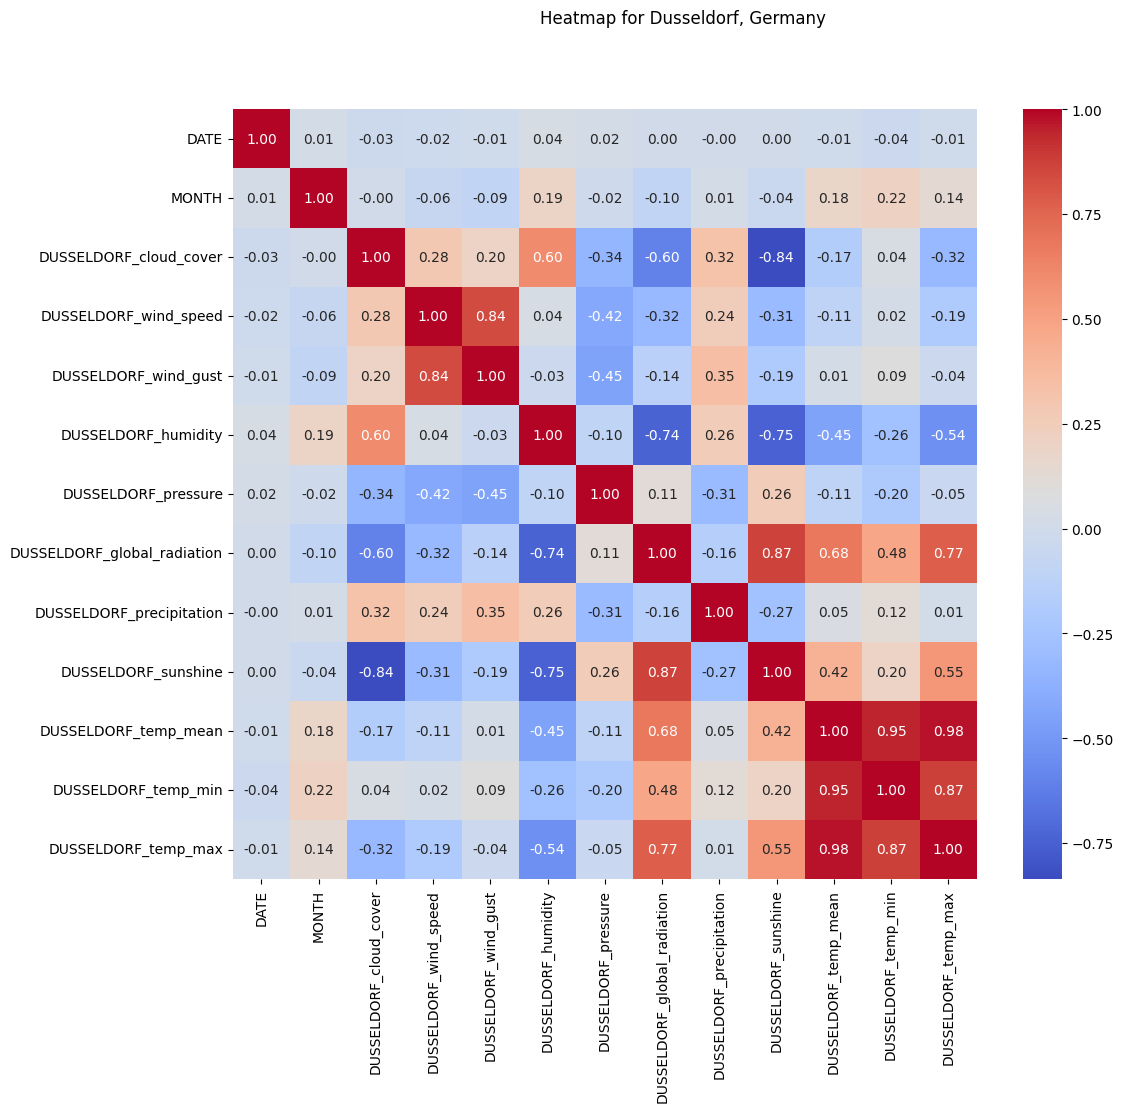

In [23]:
dusseldorf_df = cities['DUSSELDORF']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dusseldorf_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Dusseldorf, Germany")

Text(0.5, 0.98, 'Heatmap for Heathrow, UK')

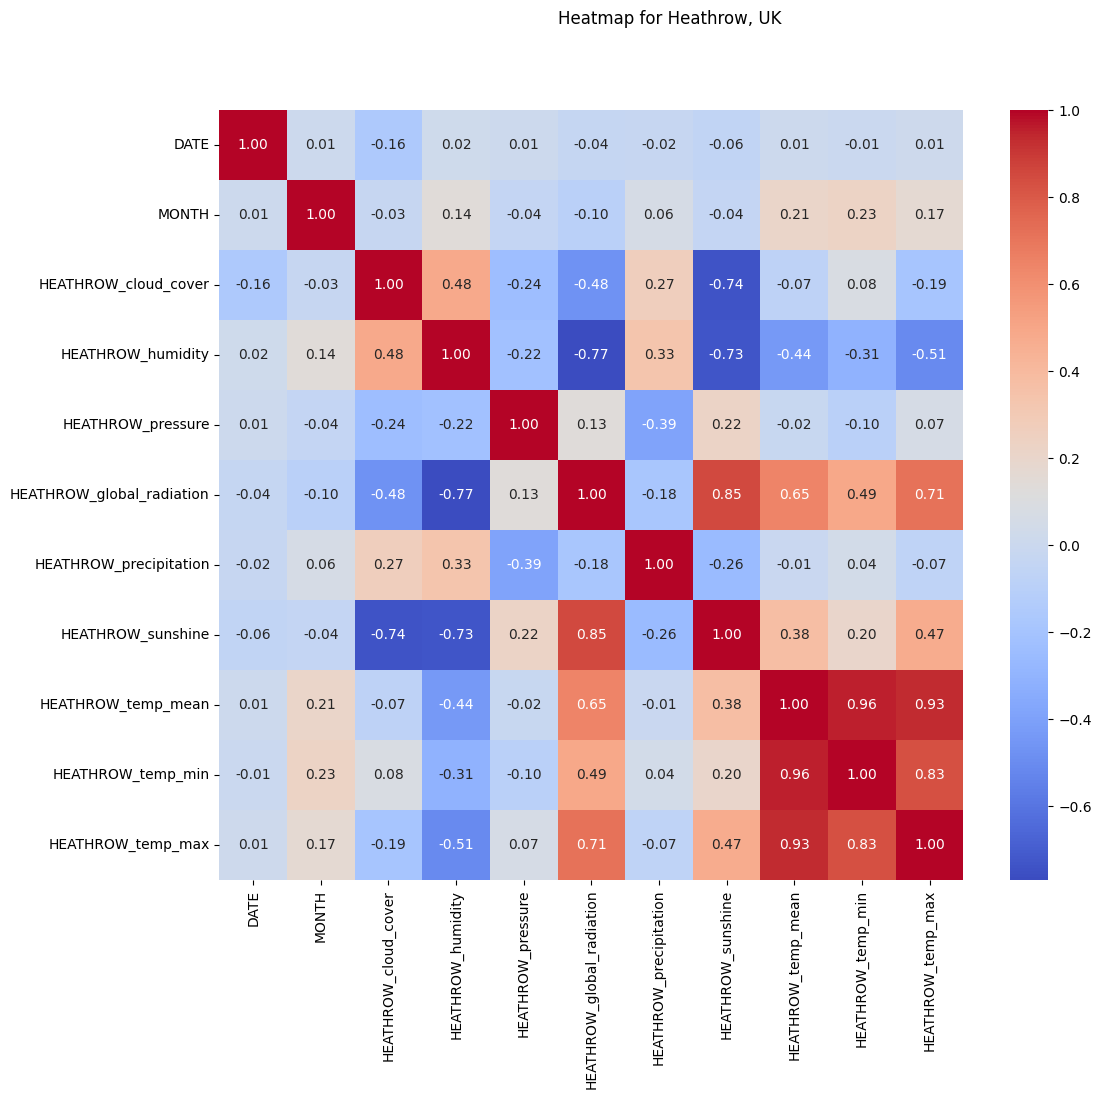

In [24]:
heathrow_df = cities['HEATHROW']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(heathrow_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Heathrow, UK")

Text(0.5, 0.98, 'Heatmap for Kassel, Germany')

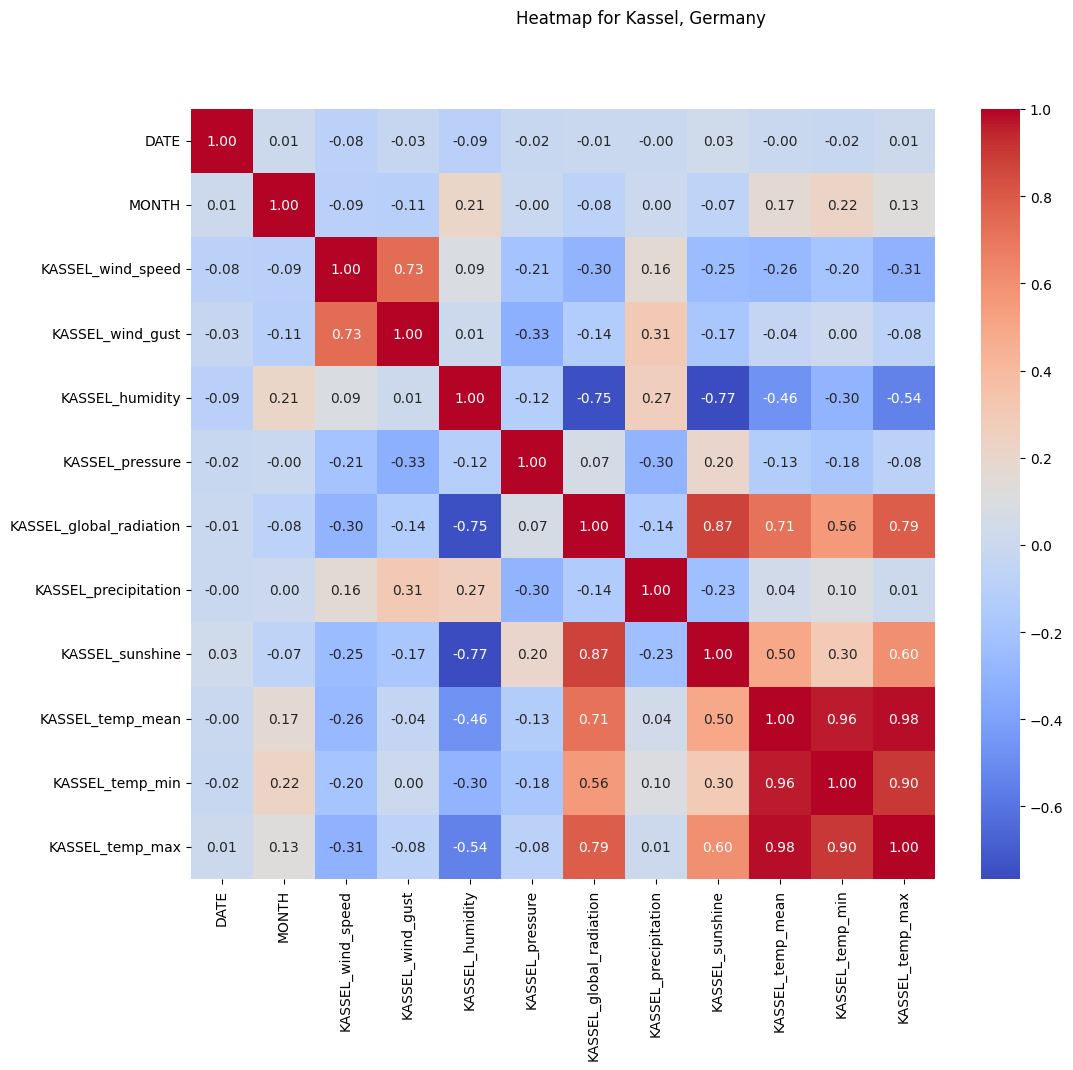

In [25]:
kassel_df = cities['KASSEL']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(kassel_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Kassel, Germany")

Text(0.5, 0.98, 'Heatmap for Ljubljana, Slovenia')

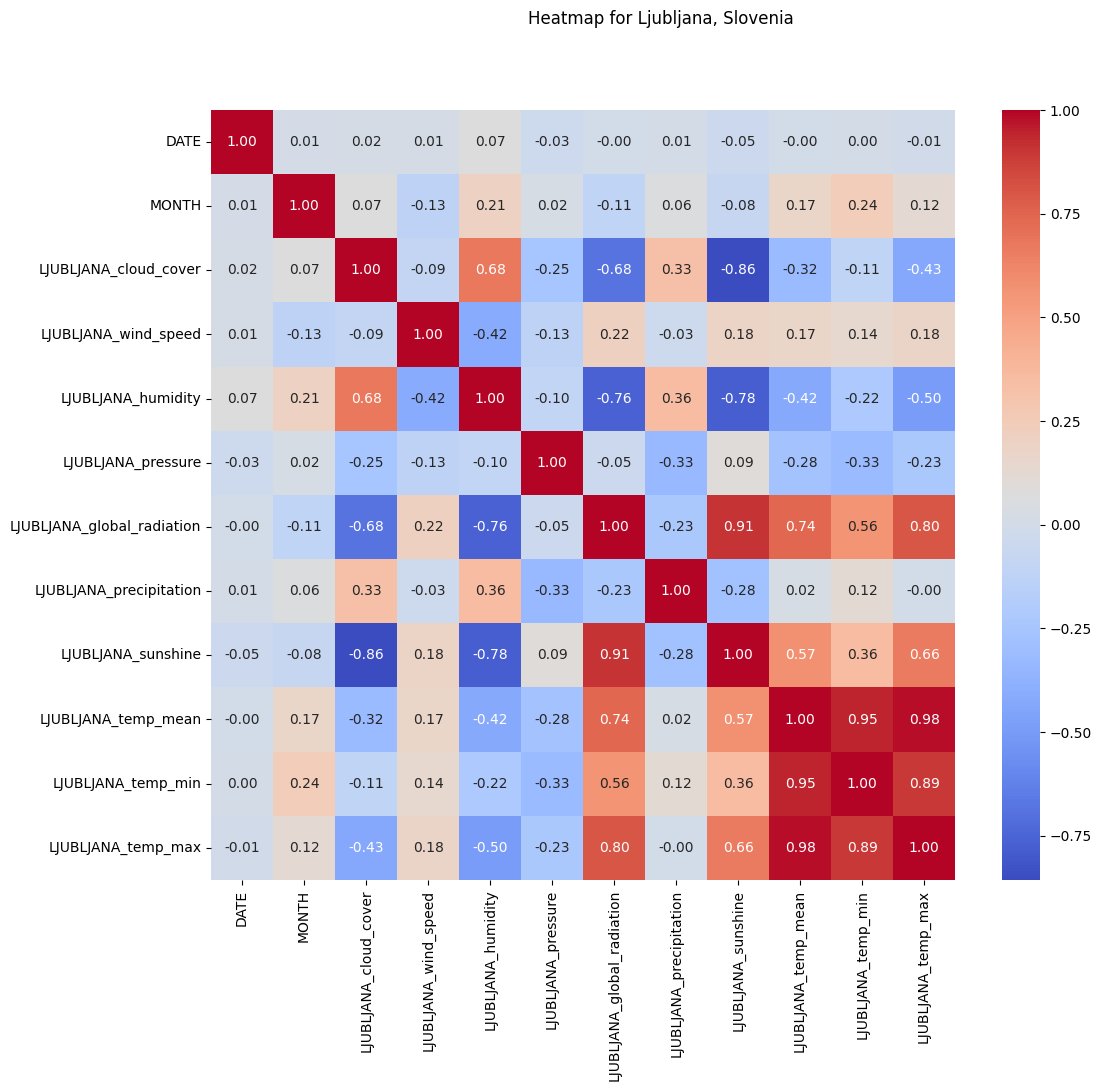

In [26]:
ljubljana_df = cities['LJUBLJANA']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(ljubljana_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Ljubljana, Slovenia")

Text(0.5, 0.98, 'Heatmap for Maastricht, the Netherlands')

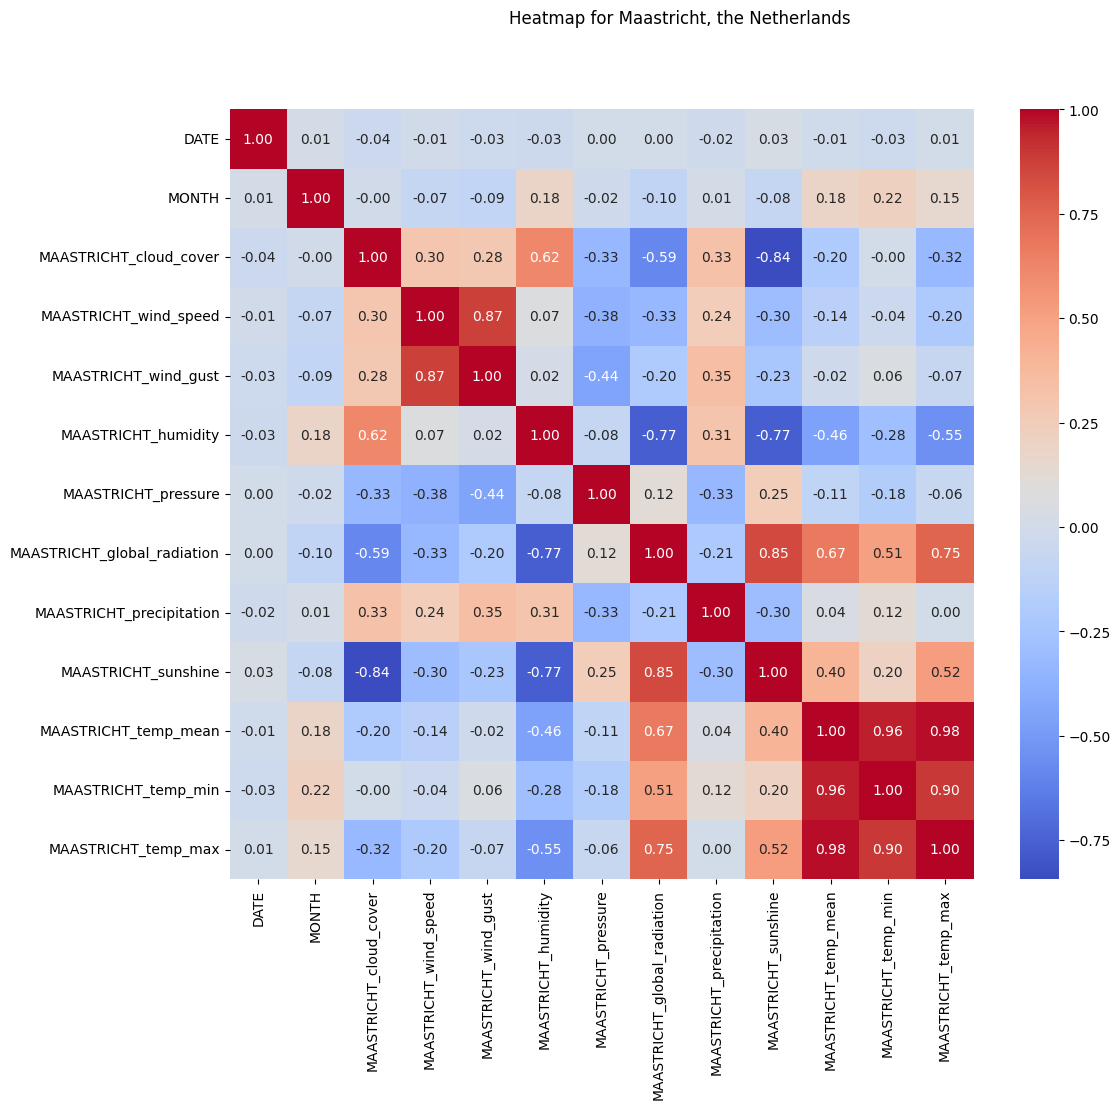

In [27]:
maastricht_df = cities['MAASTRICHT']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(maastricht_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Maastricht, the Netherlands")

Text(0.5, 0.98, 'Heatmap for Malmo, Sweden')

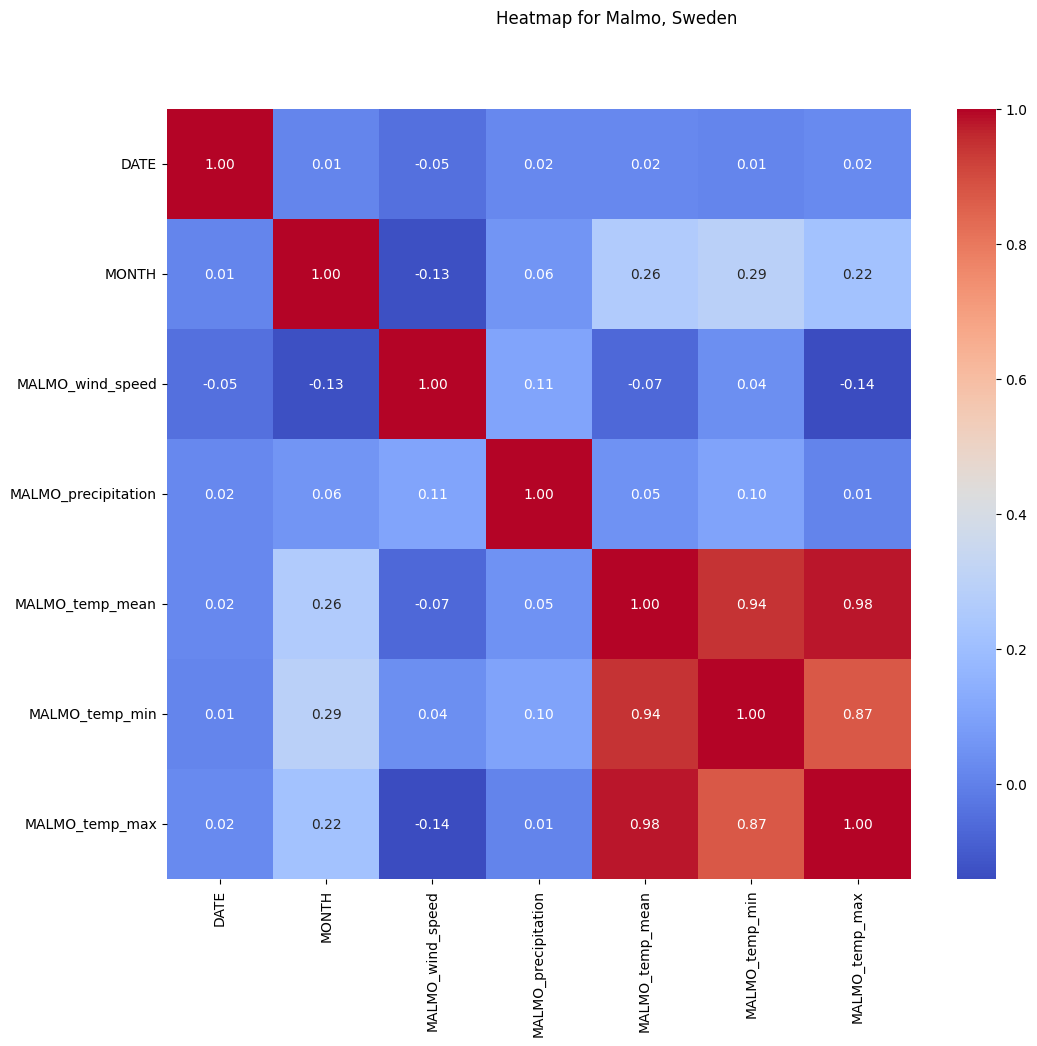

In [28]:
malmo_df = cities['MALMO']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(malmo_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Malmo, Sweden")

Text(0.5, 0.98, 'Heatmap for Montelimar, France')

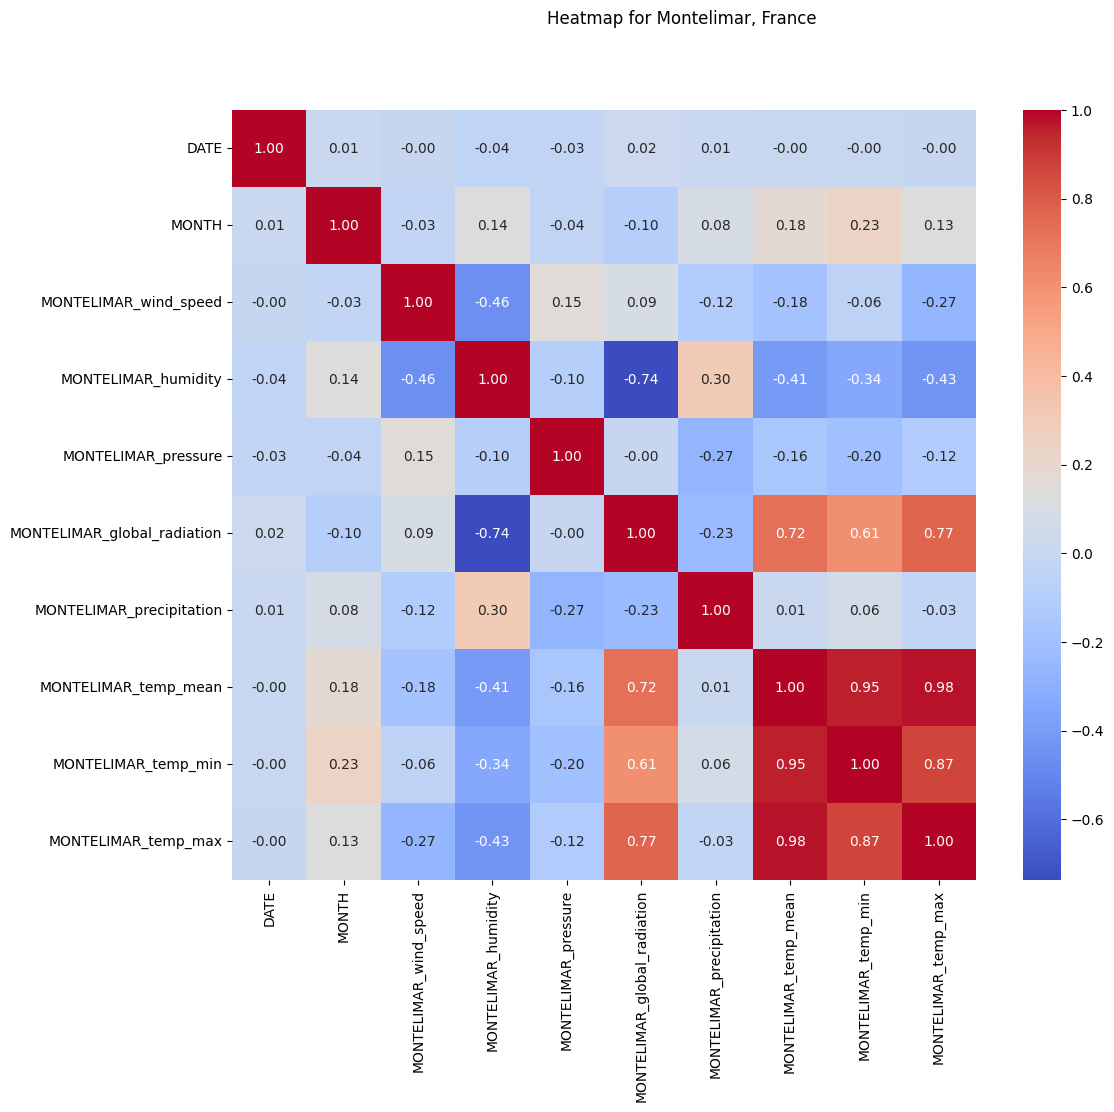

In [29]:
montelimar_df = cities['MONTELIMAR']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(montelimar_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Montelimar, France")

Text(0.5, 0.98, 'Heatmap for Muenchen, Germany')

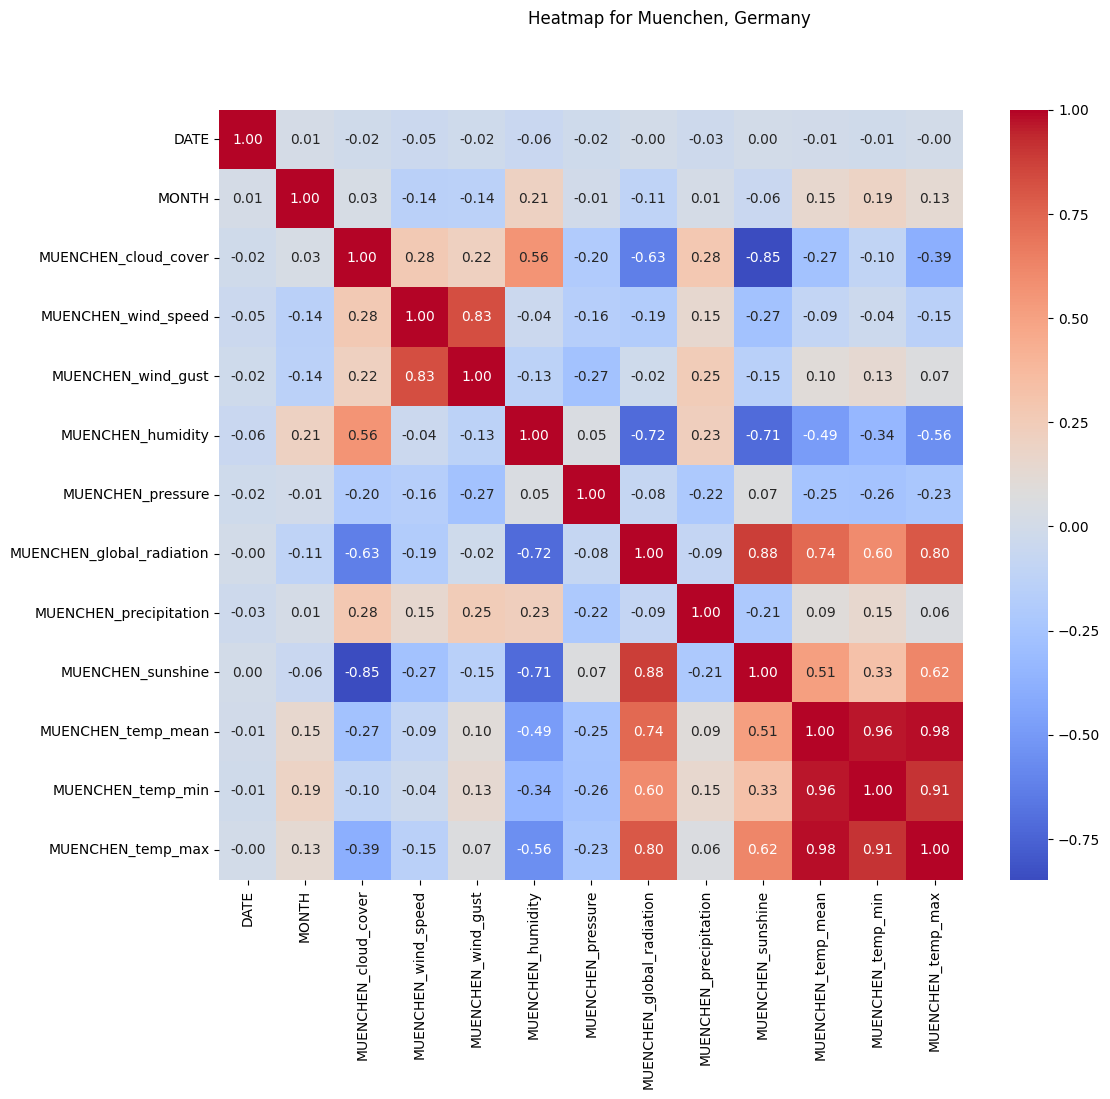

In [30]:
muenchen_df = cities['MUENCHEN']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(muenchen_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Muenchen, Germany")

Text(0.5, 0.98, 'Heatmap for Oslo, Norway')

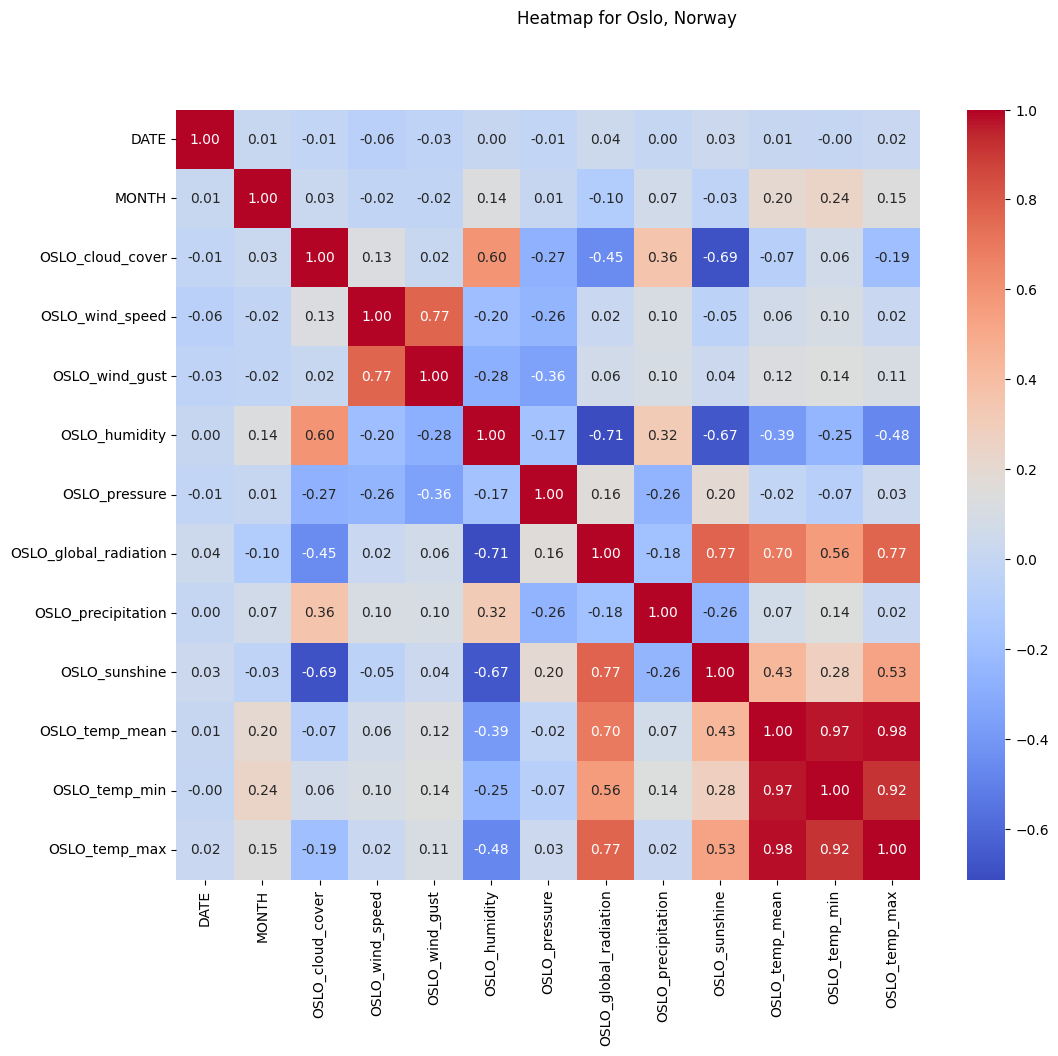

In [31]:
oslo_df = cities['OSLO']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(oslo_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Oslo, Norway")

Text(0.5, 0.98, 'Heatmap for Perpignan, France')

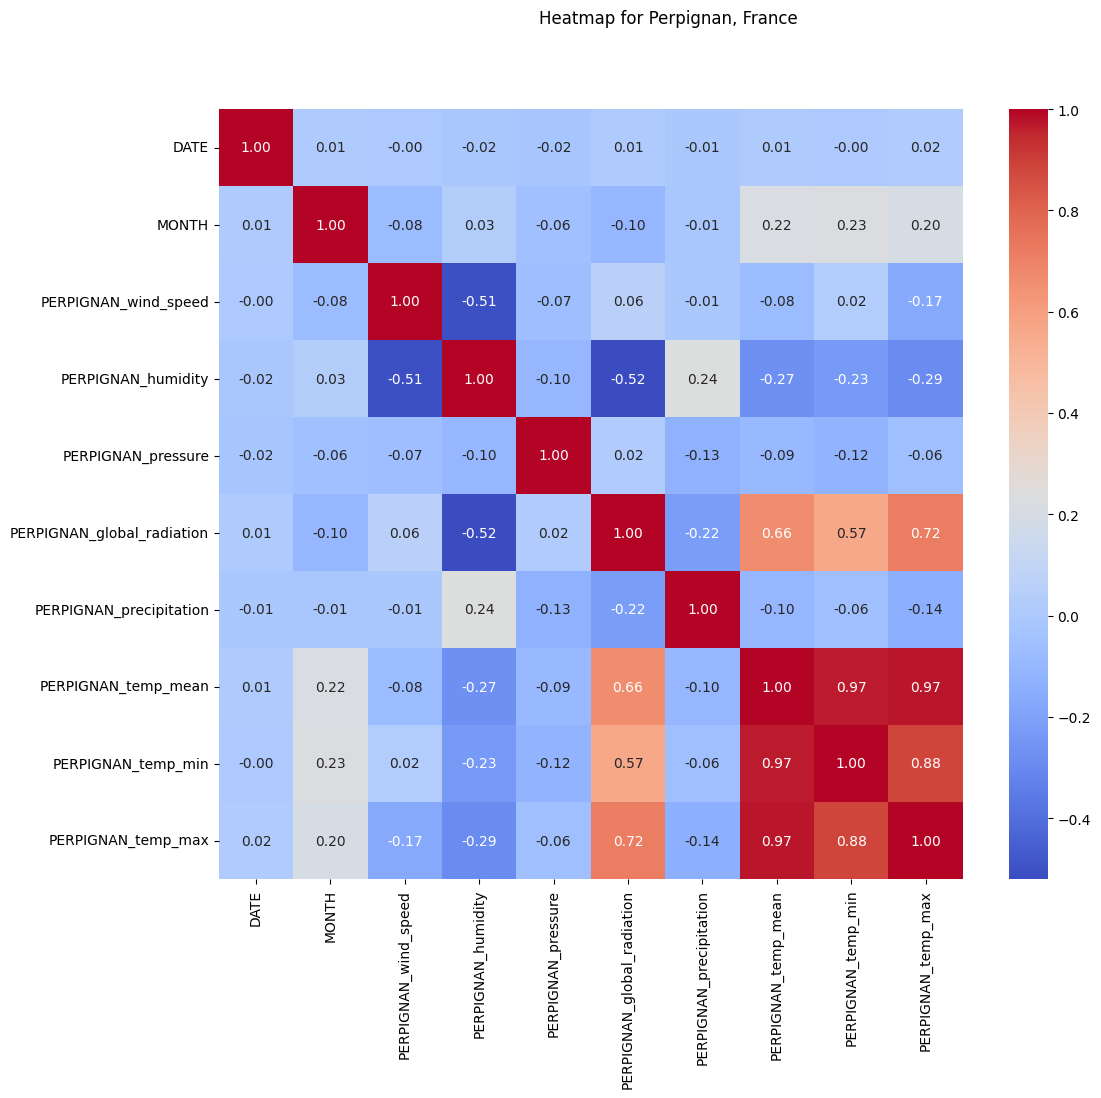

In [32]:
perpignan_df = cities['PERPIGNAN']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(perpignan_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Perpignan, France")

Text(0.5, 0.98, 'Heatmap for Roma, Italy')

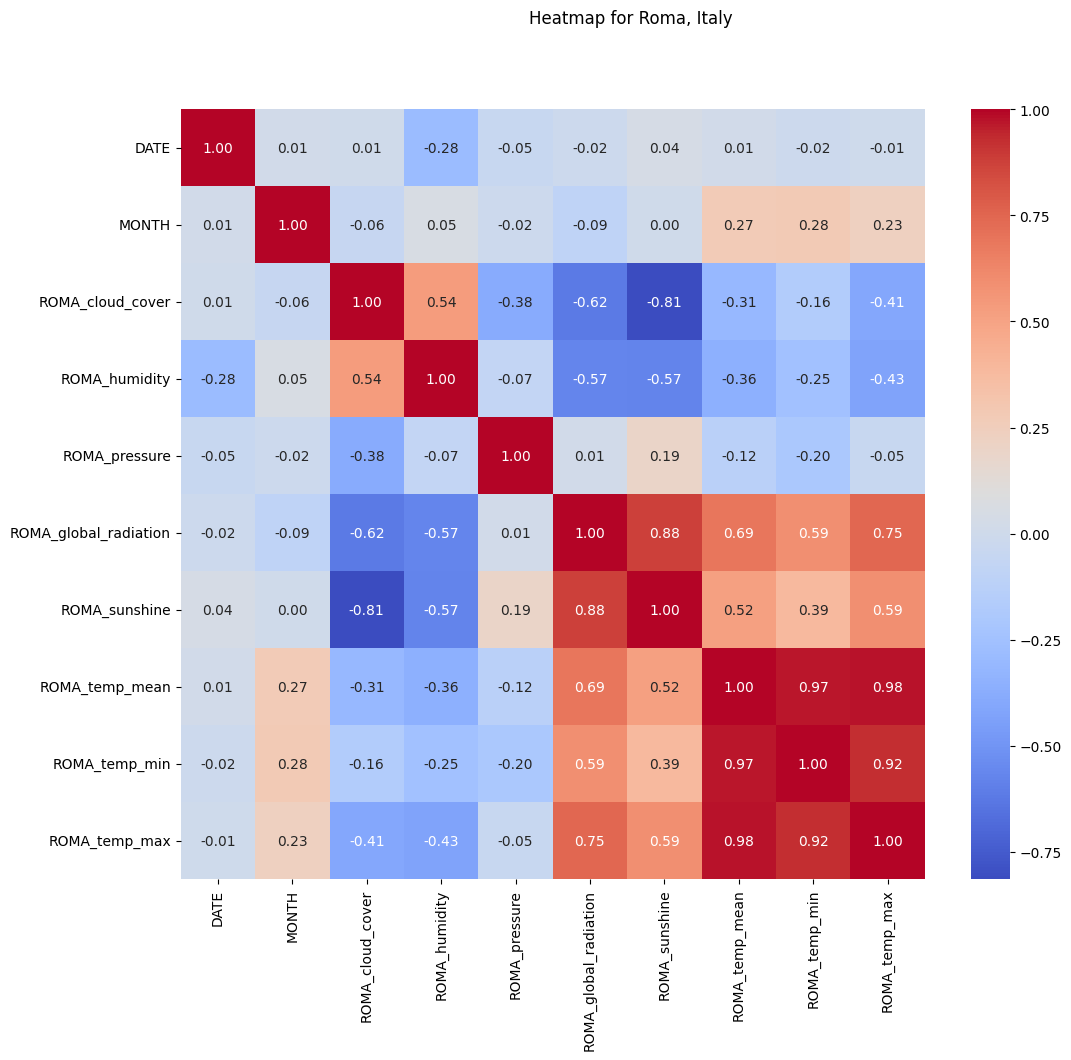

In [33]:
roma_df = cities['ROMA']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(roma_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Roma, Italy")

Text(0.5, 0.98, 'Heatmap for Sonnblick, Austria')

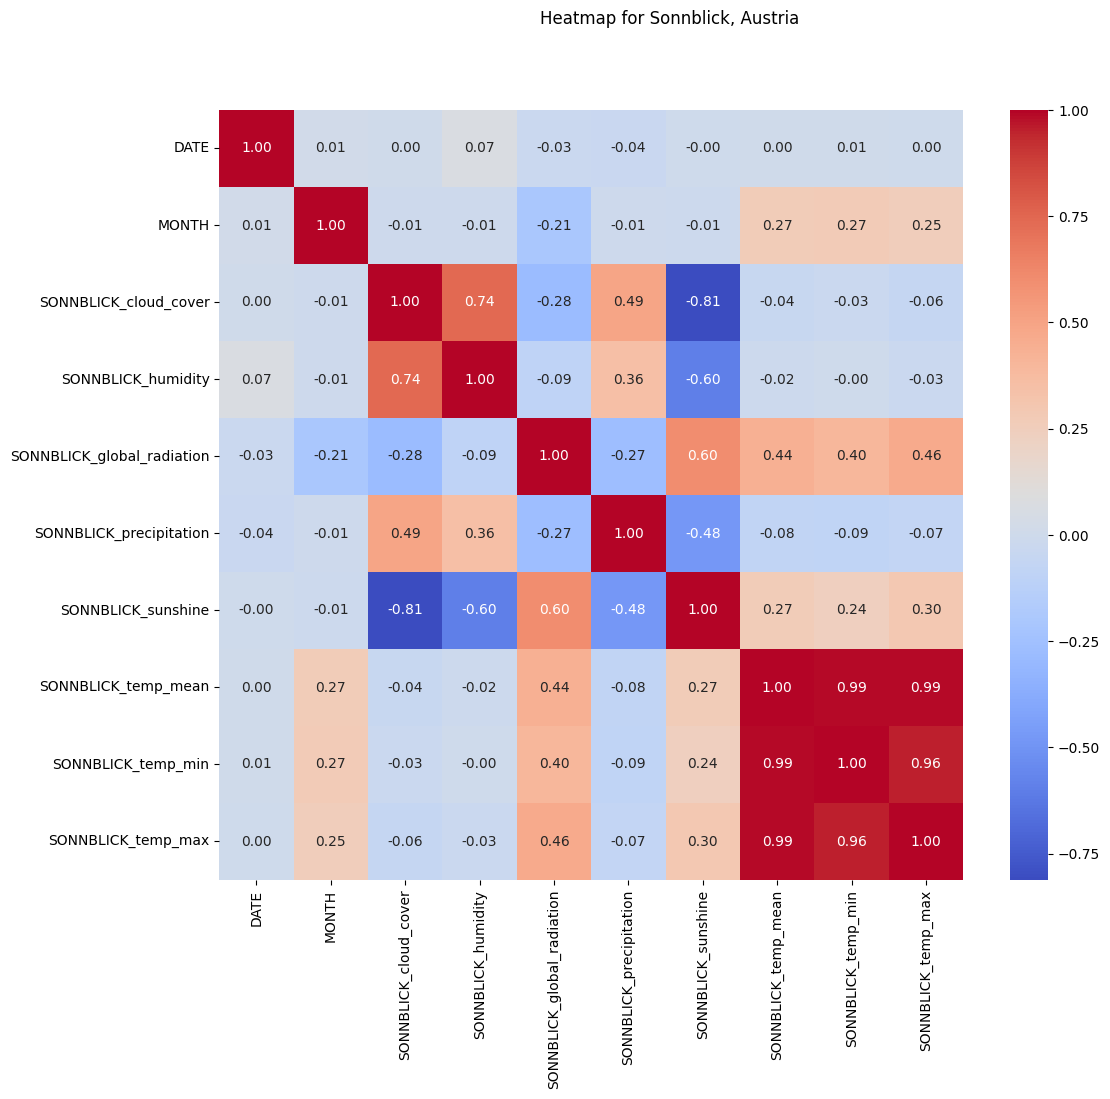

In [34]:
sonnblick_df = cities['SONNBLICK']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(sonnblick_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Sonnblick, Austria")

Text(0.5, 0.98, 'Heatmap for Stockholm, Sweden')

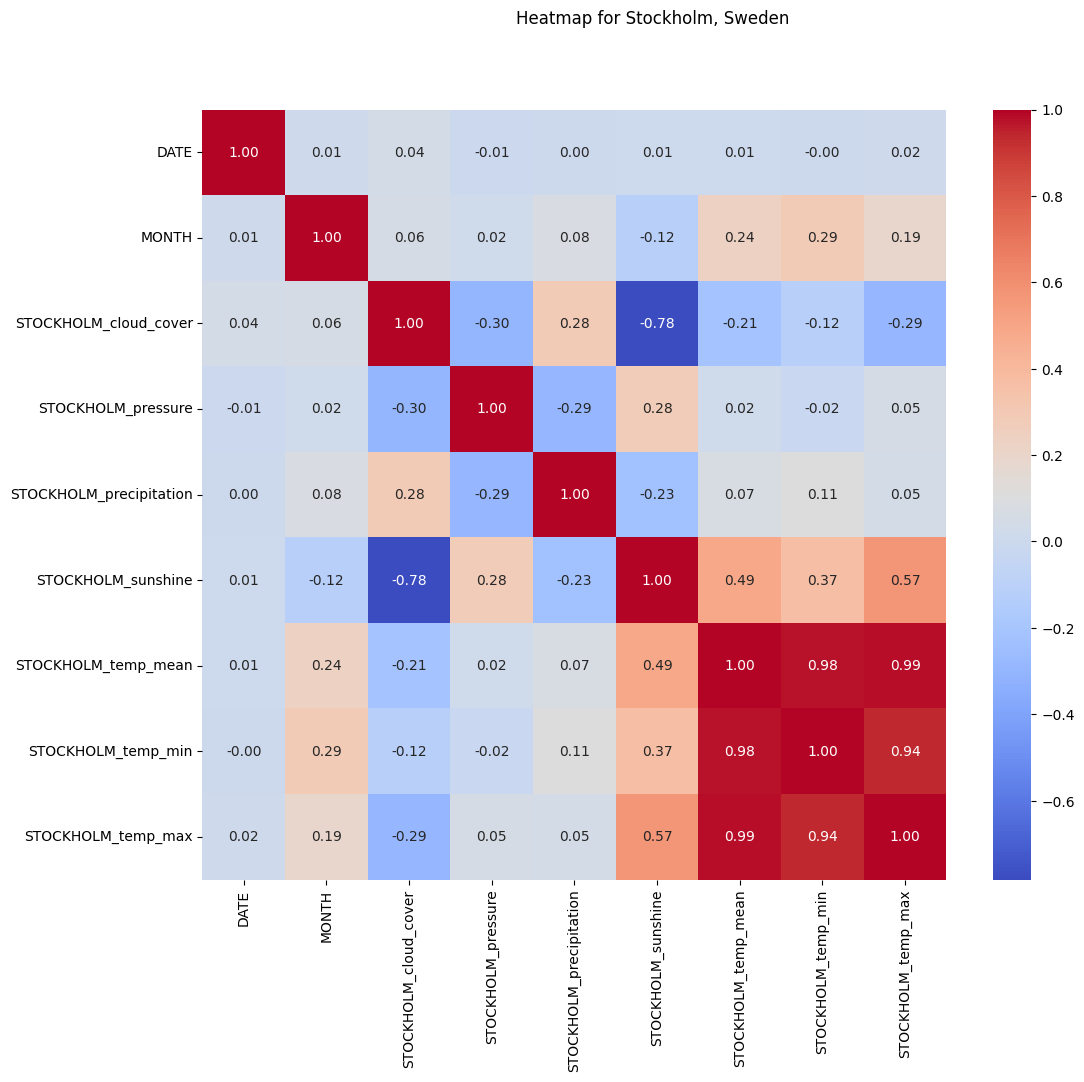

In [35]:
stockholm_df = cities['STOCKHOLM']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(stockholm_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Stockholm, Sweden")

Text(0.5, 0.98, 'Heatmap for Tours, France')

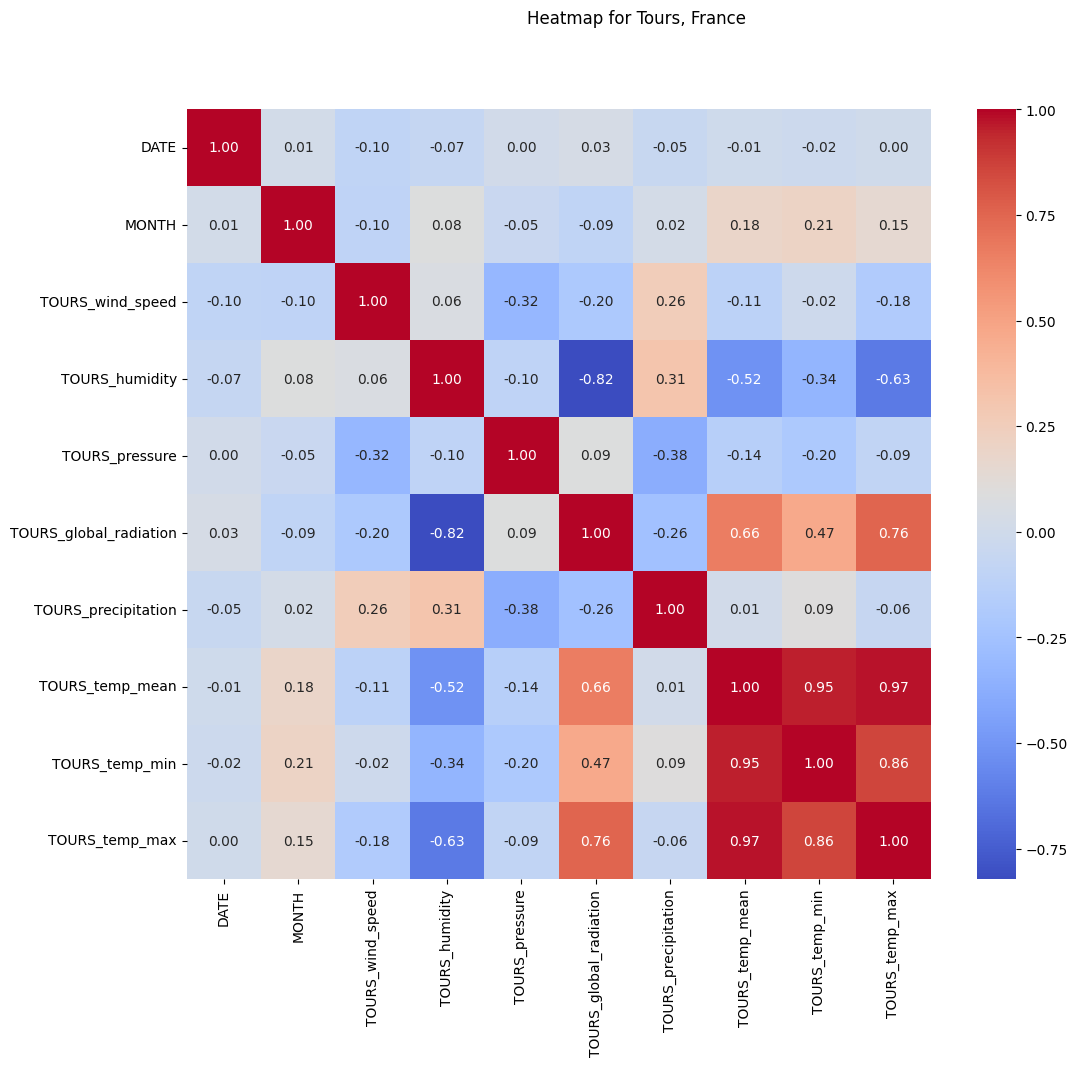

In [36]:
tours_df = cities['TOURS']
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(tours_df.corr(), annot=True, cmap="coolwarm",fmt='.2f');
f.suptitle("Heatmap for Tours, France")

In [37]:
#f, ax = plt.subplots(figsize=(120,100))
#sns.heatmap(weather_dataset.corr(), annot=True, cmap="coolwarm",fmt='.2f');
#f.suptitle("Heatmap for All cities")

Based on the heatmaps of each city, we can see there are very strong correlations for all 3 temperature values with the mean temperature. Besides that, significant degrees of correlation with global radiation and sunshine will a noticable negative correlation with humidity. It should also be noted that though month does not have a very strong correlation with temperature mean, months are tied to the seasons of the year, so including it in the model could be potentially helpful.

Let's try plotting some of the found correlations above onto a plot. All will be against temperature mean. We will use some of the locations as examples as all 18 will be too much and costly and harder to read.

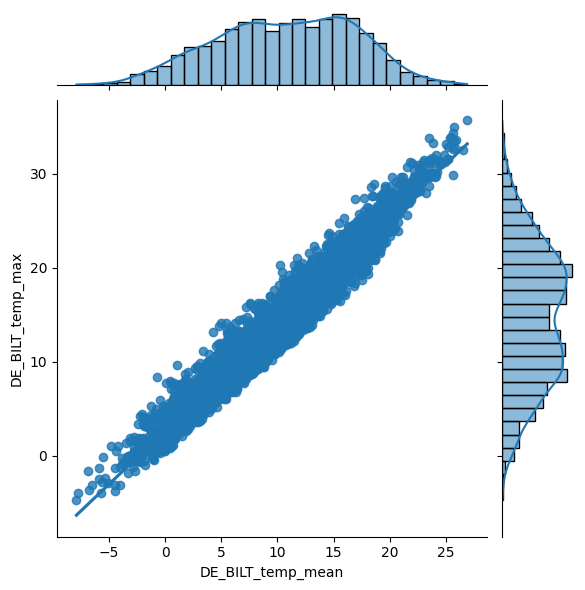

In [38]:
# De Bilt correlation graphs
# Temperature max vs temperature mean
sns.jointplot(x='DE_BILT_temp_mean', y='DE_BILT_temp_max', data=de_bilt_df, kind="reg");

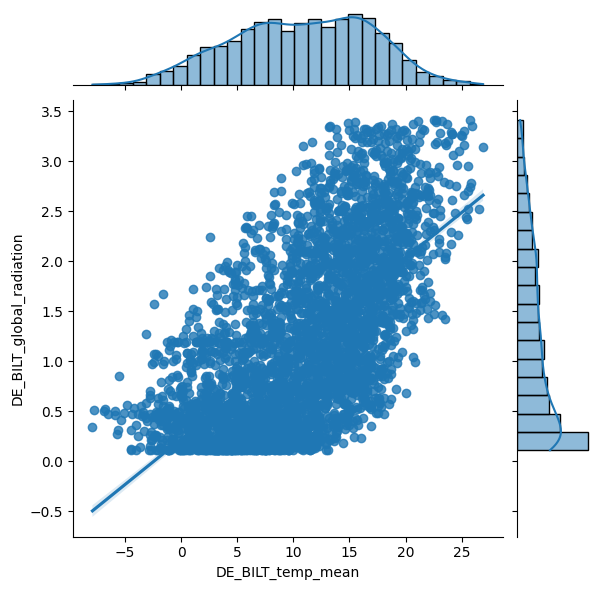

In [39]:
# Radiation vs temperature mean
sns.jointplot(x='DE_BILT_temp_mean', y='DE_BILT_global_radiation', data=de_bilt_df, kind="reg");

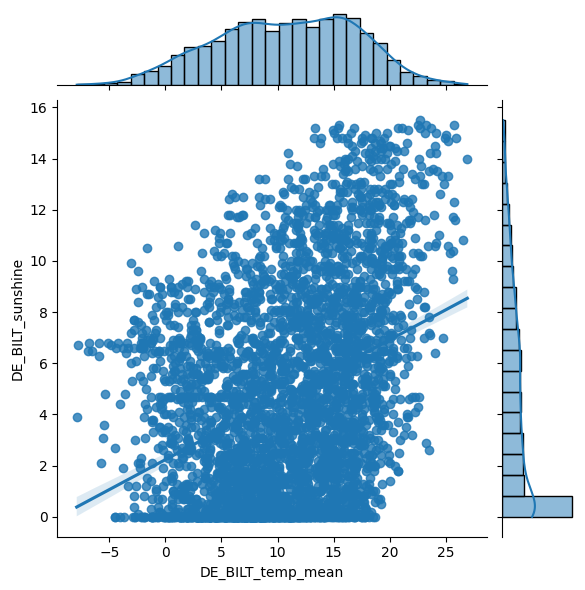

In [40]:
# Sunshine vs temperature mean
sns.jointplot(x='DE_BILT_temp_mean', y='DE_BILT_sunshine', data=de_bilt_df, kind="reg");

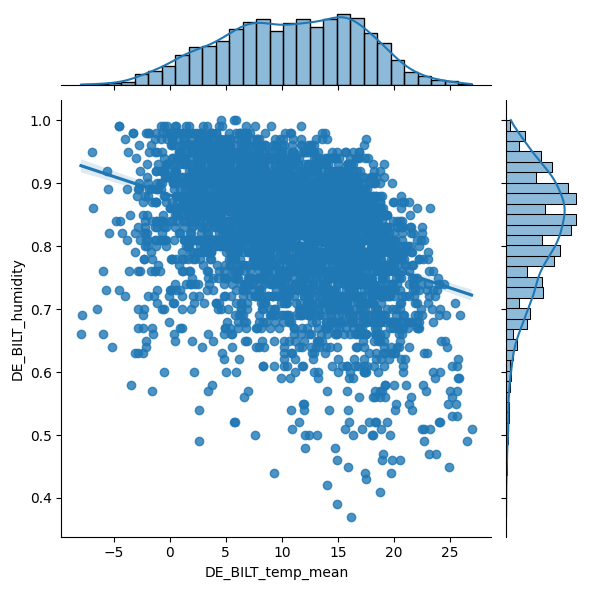

In [41]:
# Humidity vs temperature mean
sns.jointplot(x='DE_BILT_temp_mean', y='DE_BILT_humidity', data=de_bilt_df, kind="reg");

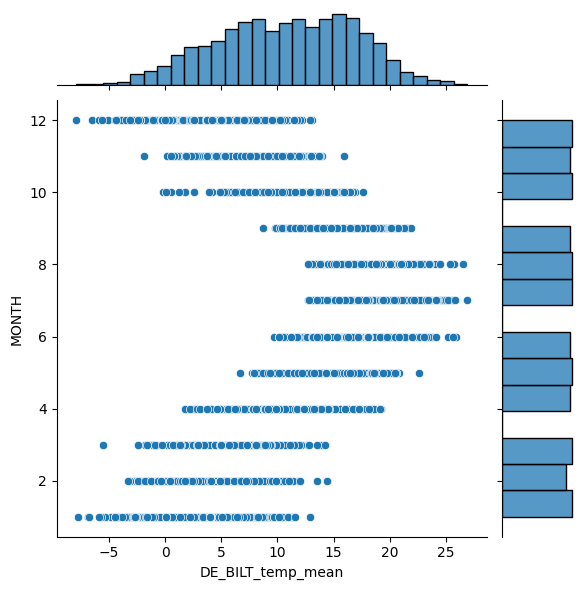

In [42]:
# Month vs temperature mean
sns.jointplot(x='DE_BILT_temp_mean', y='MONTH', data=de_bilt_df, kind="scatter");

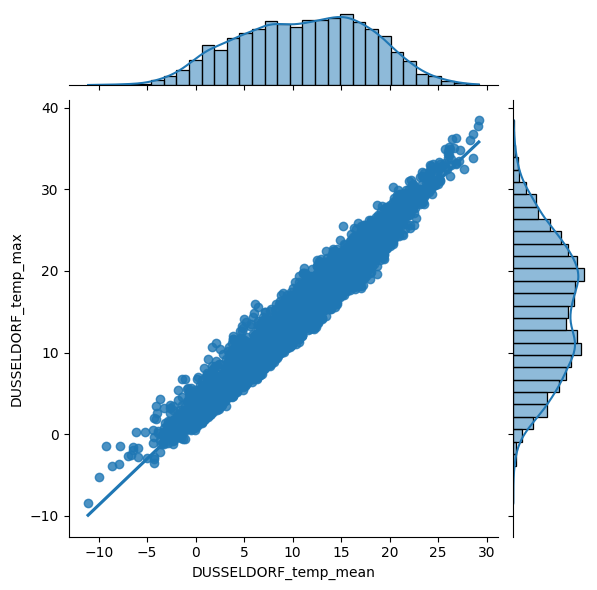

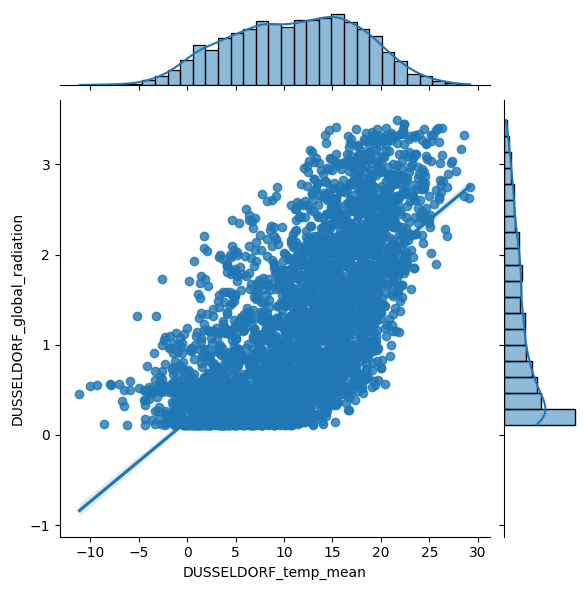

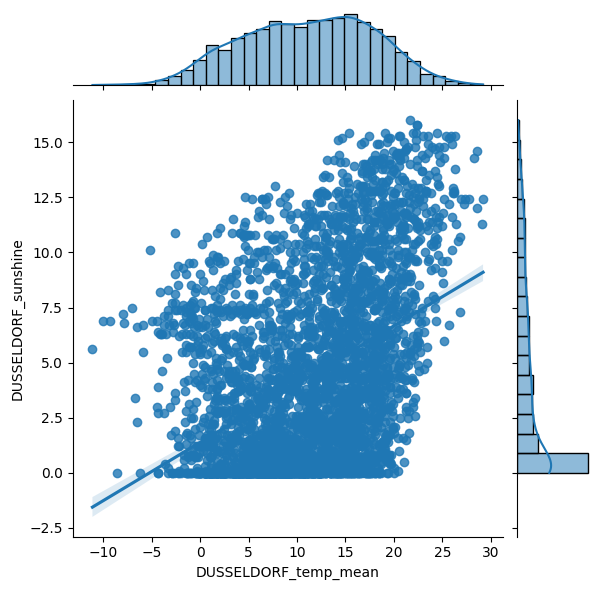

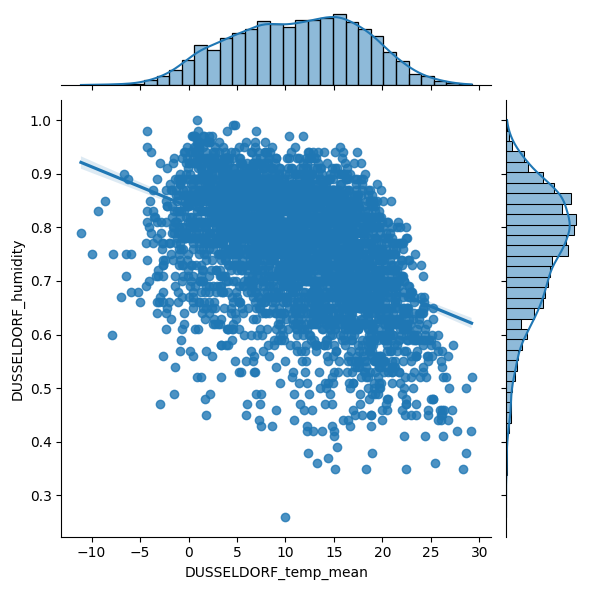

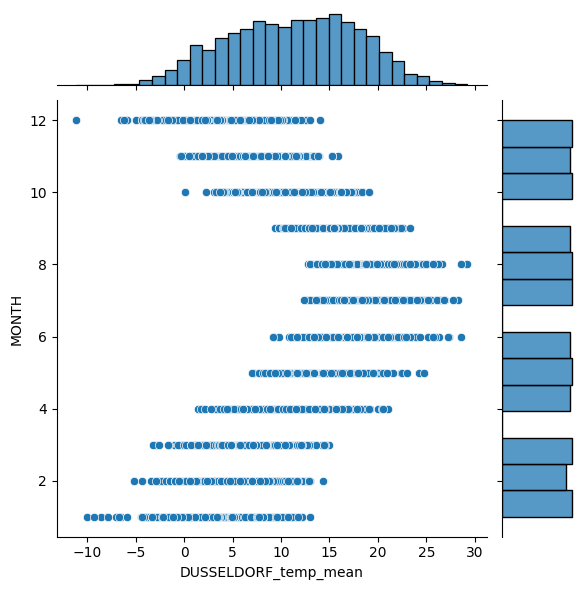

In [43]:
# Dusseldorf correlation graphs
# Temperature max vs temperature mean
sns.jointplot(x='DUSSELDORF_temp_mean', y='DUSSELDORF_temp_max', data=dusseldorf_df, kind="reg");

# Radiation vs temperature mean
sns.jointplot(x='DUSSELDORF_temp_mean', y='DUSSELDORF_global_radiation', data=dusseldorf_df, kind="reg");

# Sunshine vs temperature mean
sns.jointplot(x='DUSSELDORF_temp_mean', y='DUSSELDORF_sunshine', data=dusseldorf_df, kind="reg");

# Humidity vs temperature mean
sns.jointplot(x='DUSSELDORF_temp_mean', y='DUSSELDORF_humidity', data=dusseldorf_df, kind="reg");

# Month vs temperature mean
sns.jointplot(x='DUSSELDORF_temp_mean', y='MONTH', data=dusseldorf_df, kind="scatter");

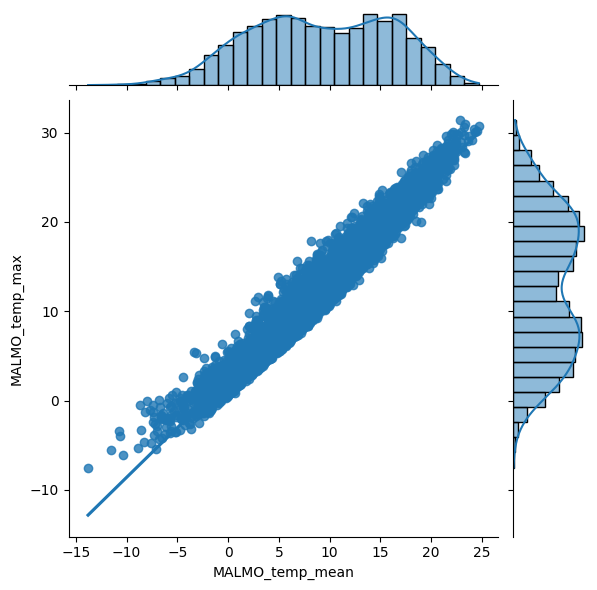

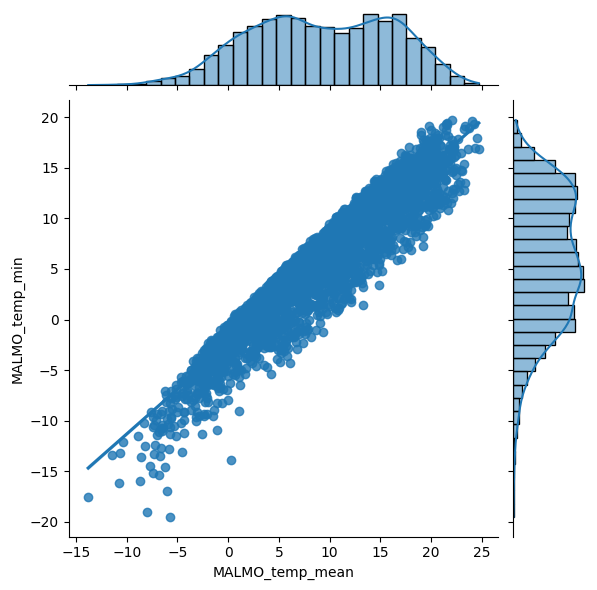

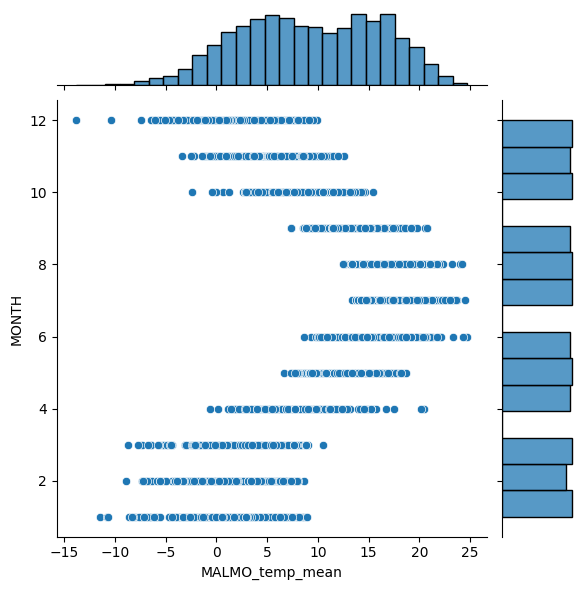

In [44]:
# Malmo correlation graphs
# Temperature max vs temperature mean
sns.jointplot(x='MALMO_temp_mean', y='MALMO_temp_max', data=malmo_df, kind="reg");

# Temperature min vs temperature mean
sns.jointplot(x='MALMO_temp_mean', y='MALMO_temp_min', data=malmo_df, kind="reg");

# Month vs temperature mean
sns.jointplot(x='MALMO_temp_mean', y='MONTH', data=malmo_df, kind="scatter");

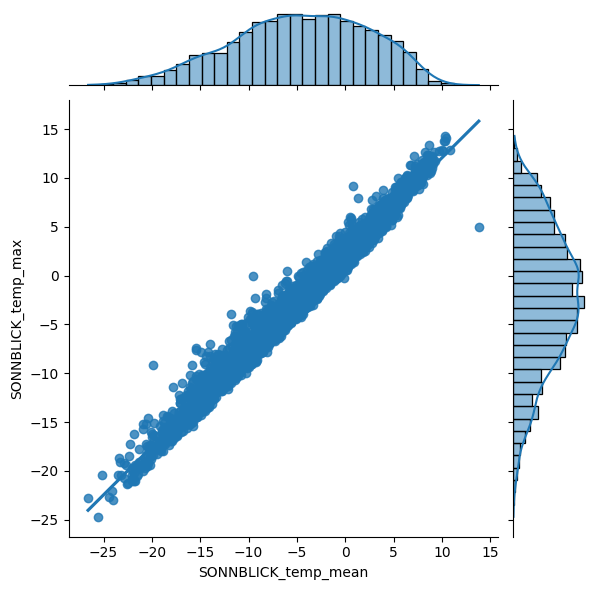

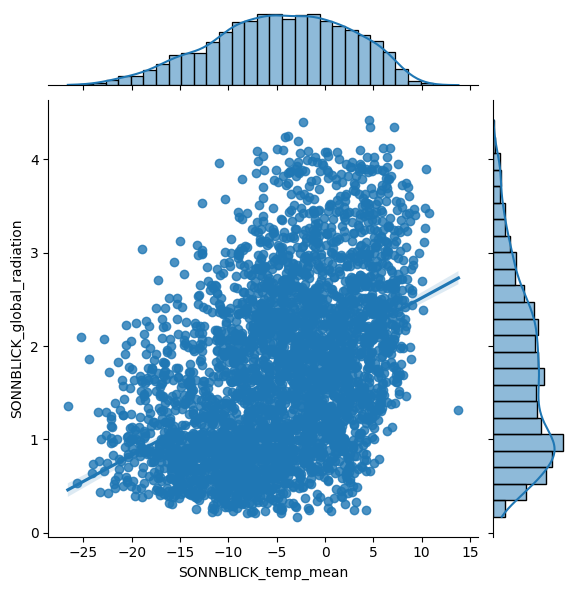

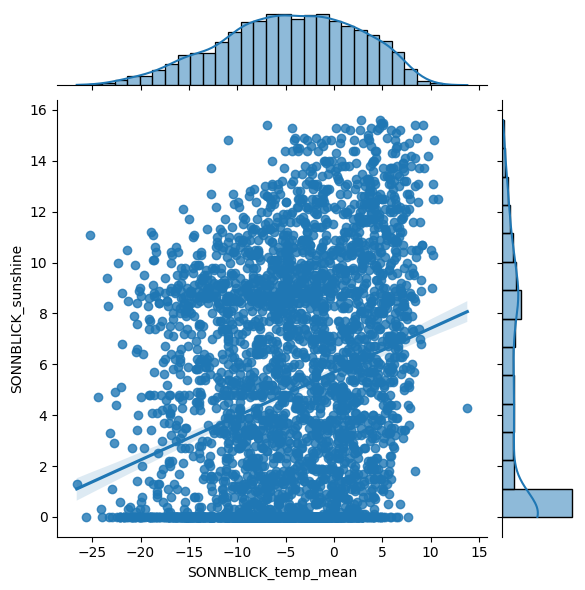

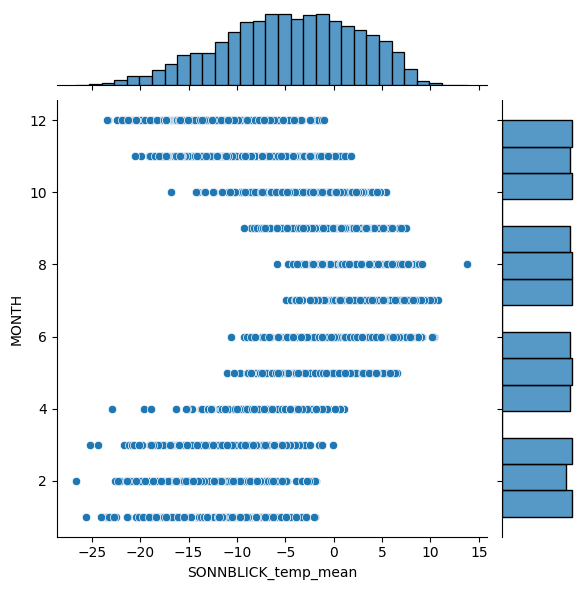

In [45]:
# Sonnblick correlation graphs
# Temperature max vs temperature mean
sns.jointplot(x='SONNBLICK_temp_mean', y='SONNBLICK_temp_max', data=sonnblick_df, kind="reg");

# Radiation vs temperature mean
sns.jointplot(x='SONNBLICK_temp_mean', y='SONNBLICK_global_radiation', data=sonnblick_df, kind="reg");

# Sunshine vs temperature mean
sns.jointplot(x='SONNBLICK_temp_mean', y='SONNBLICK_sunshine', data=sonnblick_df, kind="reg");

# Month vs temperature mean
sns.jointplot(x='SONNBLICK_temp_mean', y='MONTH', data=sonnblick_df, kind="scatter");

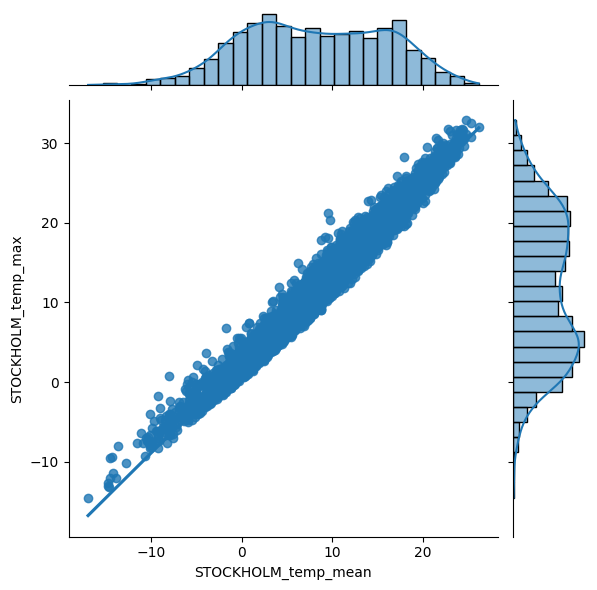

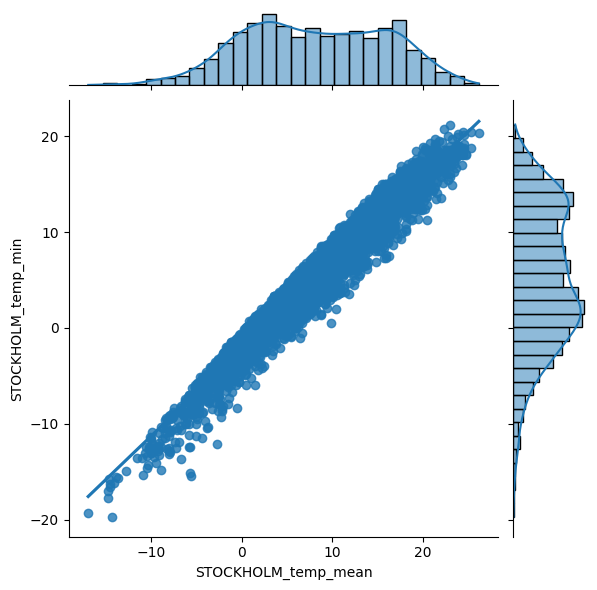

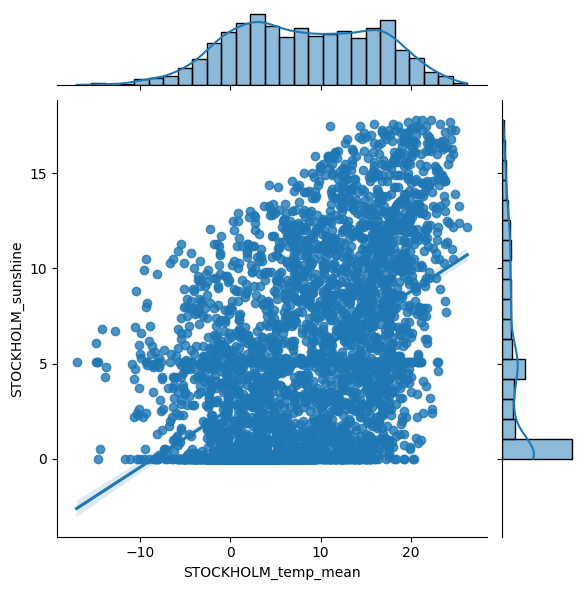

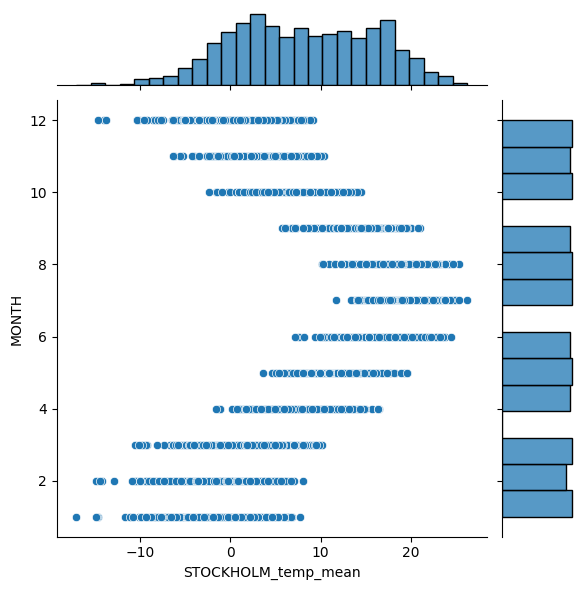

In [46]:
# Stockholm correlation graphs
# Temperature max vs temperature mean
sns.jointplot(x='STOCKHOLM_temp_mean', y='STOCKHOLM_temp_max', data=stockholm_df, kind="reg");

# Temperature min vs temperature mean
sns.jointplot(x='STOCKHOLM_temp_mean', y='STOCKHOLM_temp_min', data=stockholm_df, kind="reg");

# Sunshine vs temperature mean
sns.jointplot(x='STOCKHOLM_temp_mean', y='STOCKHOLM_sunshine', data=stockholm_df, kind="reg");

# Month vs temperature mean
sns.jointplot(x='STOCKHOLM_temp_mean', y='MONTH', data=stockholm_df, kind="scatter");

Seems like ultimately, the best predictor for the mean temperature would be the 3 temperature values from the previous day. Alongside those, variables with noticable correlation are month, global radiation, sunshine, and humidity. Even for places like Malmo that lack much of the weather variables, having all 3 temperature values will likely still be enough to make relatively accurate predicitions. Budapest as a result may be a location of concern as it lacks minimum temperature values across all 10 years. For Sonnblick, it itself is a bit of an outlier as a location for it is near a mountain peak in Austria, but based on the graphs above, there is still evidence for correlation with the available weather data.

Though tested with some PDA analysis, ultimately will not proceed with it nor with scaling in the EDA step. May consider revisitng them in preprocessing step. If proceeding with a linear regression model, then will have a scaled dataset. As for now, no changes will be made to the existing weather dataset.